In [1]:
%pwd

'/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/notebooks'

In [2]:
%cd ..

/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution


In [3]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tools
from pylab import *
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import os
import glob
import standard.analysis as sa
import tools
import matplotlib.pyplot as plt
import task
import tensorflow as tf
from model import FullModel
from dict_methods import *

%matplotlib inline

In [4]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['image.cmap']='jet'

In [5]:
d = '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files'

In [6]:
files = glob.glob(os.path.join(d,'cluster_big50'))
res = defaultdict(list)
for f in files:
    temp = tools.load_all_results(f, argLast = False)
    chain_defaultdicts(res, temp)

['/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000000', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000001', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000002', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000003', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000004', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000005', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000006', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000007', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000008', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/files/cluster_big50/000009', '/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olf

/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/tools.py:226: RuntimeWarning: divide by zero encountered in log
  res['train_logloss'] = np.log(res['train_loss'])


(0, 10000)

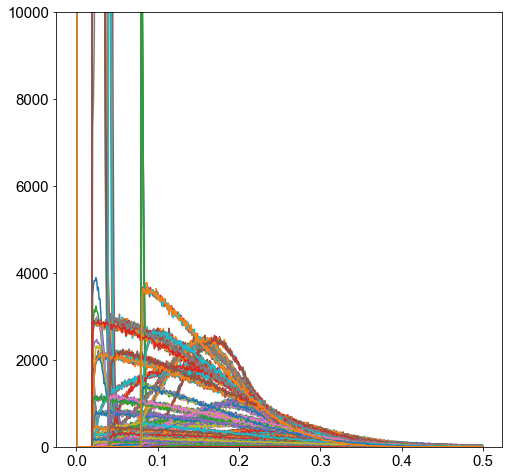

In [7]:
plt.figure(figsize=(8,8))
plt.plot(res['lin_bins'][0,:500],res['lin_hist'][:,-1,:500].T)
plt.ylim([0, 10000])

In [8]:
peak_inds = np.zeros_like(res['kc_prune_threshold']).astype(np.bool)
for i, thres in enumerate(res['kc_prune_threshold']):
    x = np.where(res['lin_bins'][i,:-1] > res['kc_prune_threshold'][i])[0][0]
    if res['lin_hist'][i,-1,x] > 4000:
        peak_inds[i] = False
    else:
        peak_inds[i] = True
peak_inds    

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [9]:
res['separate_lr'][np.invert(peak_inds)]

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

(0, 10000)

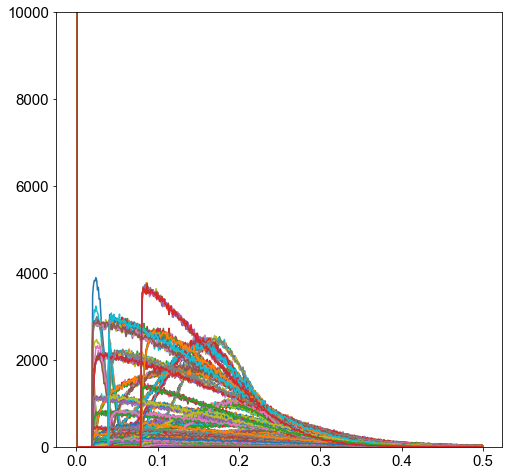

In [10]:
plt.figure(figsize=(8,8))
plt.plot(res['lin_bins'][0,:500],res['lin_hist'][peak_inds,-1,:500].T)
plt.ylim([0, 10000])

(0, 10000)

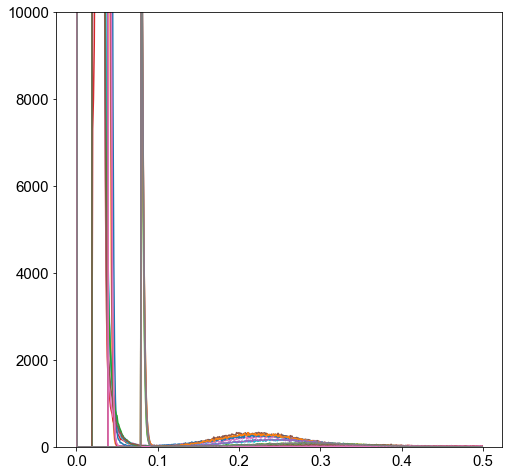

In [11]:
plt.figure(figsize=(8,8))
plt.plot(res['lin_bins'][0,:500],res['lin_hist'][np.invert(peak_inds),-1,:500].T)
plt.ylim([0, 10000])

In [12]:
acc_ind = res['train_acc'][:,-1] > .75
res['separate_lr'][np.invert(acc_ind)]

array([0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.001, 0.001, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.001, 0.001,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.001, 0.001, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.001, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.001, 0.001, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.001])

In [13]:
badkc_ind = res['bad_KC'][:,-1] < .2
res['separate_lr'][np.invert(badkc_ind)]

array([0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.001, 0.001, 0.001, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.001, 0.001, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.001,
       0.001, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.001, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.001, 0.001, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.001, 0.001])

In [14]:
ind = np.logical_and(badkc_ind, acc_ind, peak_inds)
res['separate_lr'][ind]

array([1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03,
       1.e-03, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04,
       3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05,
       3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 3.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03,
       1.e-03, 1.e-03, 1.e-03, 1.e-03, 3.e-04, 3.e-04, 3.e-04, 3.e-04,
       3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 3.e-05, 3.e-05, 3.e-05, 3.e-05,
       3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
      

In [15]:
#filter
for k, v in res.items():
    res[k] = v[peak_inds]

In [16]:
def _get_K(res):
    n_model, n_epoch = res['sparsity'].shape[:2]
    Ks = np.zeros((n_model, n_epoch))
    bad_KC = np.zeros((n_model, n_epoch))
    for i in range(n_model):
        for j in range(n_epoch):
            sparsity = res['sparsity'][i, j]
            Ks[i, j] = sparsity[sparsity>0].mean()
            bad_KC[i,j] = np.sum(sparsity==0)/sparsity.size
    res['K'] = Ks
    res['bad_KC'] = bad_KC

In [17]:
_get_K(res)

In [18]:
def simple_plot(xkey, ykey, filter_dict = None):
    if filter_dict is not None:
        temp = filter.filter(res, filter_dict=filter_dict)
    
    x = res[xkey]
    y = res[ykey][:,-1]
    plt.figure()
    plt.plot(np.log(x), y, '*')
    plt.xticks(np.log(x),x)
    plt.xlabel(xkey)
    plt.ylabel(ykey)
    
    if filter_dict is not None:
        plt.legend('{} = {}'.format(filter_dict.key,value))

In [19]:
def marginal_plot(xkey, ykey, vary_key, marginals=None):
    plt.figure()
    for i in np.unique(res[vary_key]):
        temp = filter(res, {vary_key:i})
        if marginals:
            temp = filter(temp, marginals)
        x = temp[xkey]
        y = temp[ykey][:,-1]

        plt.plot(np.log(x), y, '*')
    x = np.unique(res[xkey])
    plt.xticks(np.log(x),x)
    plt.xlabel(xkey)
    plt.ylabel(ykey)
    plt.legend(np.unique(res[vary_key]))
    plt.title(marginals)

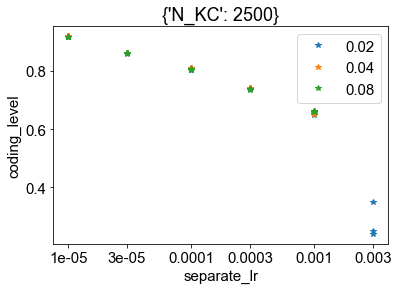

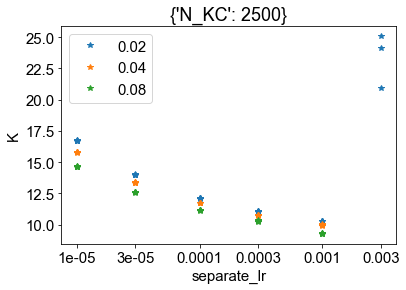

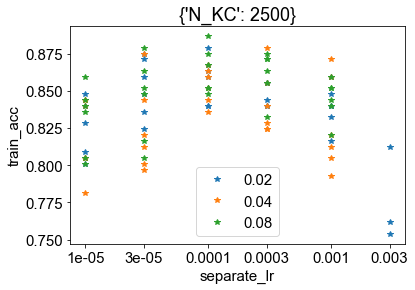

In [20]:
marginal_plot('separate_lr', 'coding_level', 'kc_prune_threshold', {'N_KC':2500})
marginal_plot('separate_lr', 'K', 'kc_prune_threshold', {'N_KC':2500})
marginal_plot('separate_lr', 'train_acc', 'kc_prune_threshold', {'N_KC':2500})

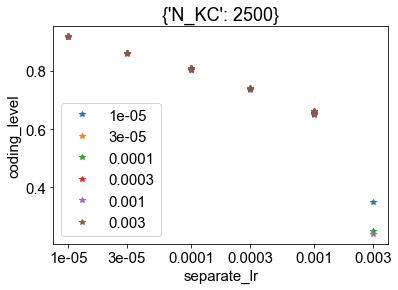

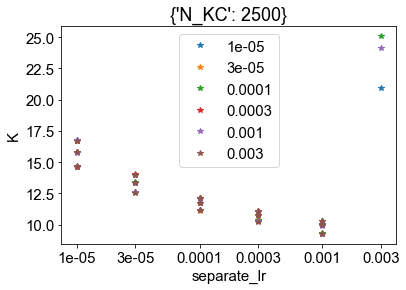

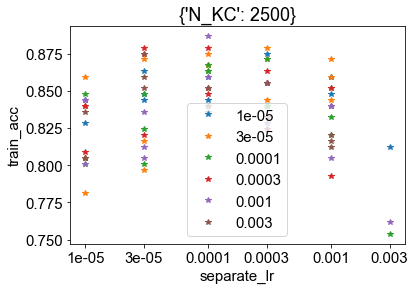

In [21]:
marginal_plot('separate_lr', 'coding_level', 'lr', {'N_KC':2500})
marginal_plot('separate_lr', 'K', 'lr', {'N_KC':2500})
marginal_plot('separate_lr', 'train_acc', 'lr', {'N_KC':2500})

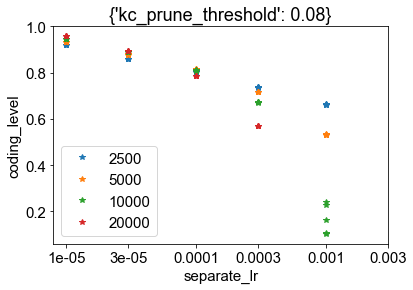

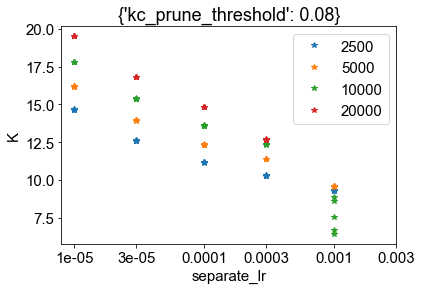

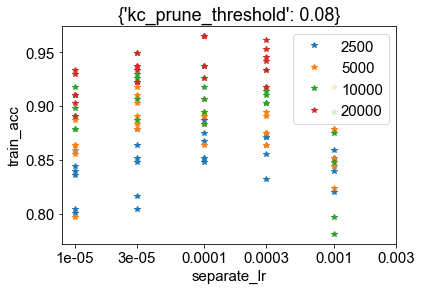

In [22]:
marginal_plot('separate_lr', 'coding_level', 'N_KC', {'kc_prune_threshold':0.08})
marginal_plot('separate_lr', 'K', 'N_KC', {'kc_prune_threshold':0.08})
marginal_plot('separate_lr', 'train_acc', 'N_KC', {'kc_prune_threshold':0.08})

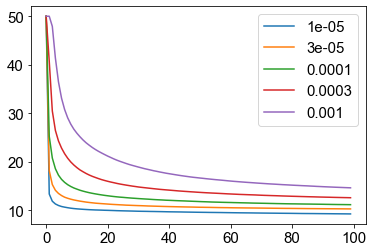

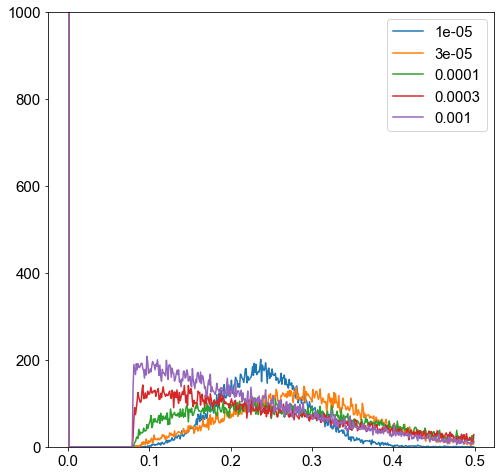

In [23]:
x = filter(res, {'N_KC':2500, 'kc_prune_threshold':0.08, 'lr':0.0003})
plt.plot(x['K'].T)
plt.legend(np.unique(x['separate_lr']))

plt.figure(figsize=(8,8))
plt.plot(x['lin_bins'][0,:500],x['lin_hist'][:,-1,:500].T)
plt.ylim([0, 1000])
plt.legend(np.unique(x['separate_lr']))

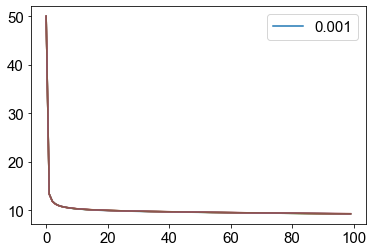

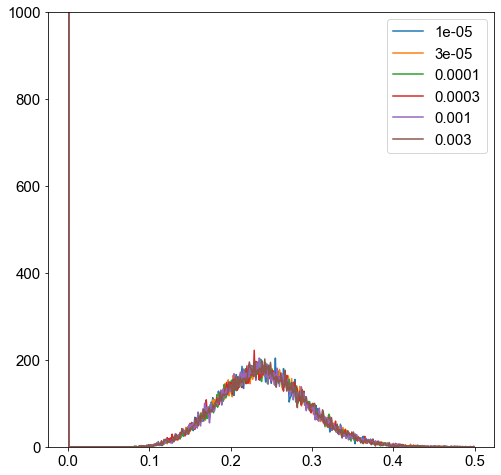

In [31]:
x = filter(res, {'N_KC':2500, 'kc_prune_threshold':0.08, 'separate_lr':0.001})
plt.plot(x['K'].T)
plt.legend(np.unique(x['separate_lr']))

plt.figure(figsize=(8,8))
plt.plot(x['lin_bins'][0,:500],x['lin_hist'][:,-1,:500].T)
plt.ylim([0, 1000])
plt.legend(np.unique(x['lr']))